In [56]:
# imports
import os
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from sklearn.utils import shuffle



In [57]:
print(os.listdir('input'))

['sample_submission.csv', 'test', 'train', 'train.csv']


In [58]:
data_dir = "input"
train_dir = data_dir + "/train/"
test_dir = data_dir + "/test/"
train_f_url = data_dir + "/train.csv"
test_f_url = data_dir + "/sample_submission.csv"
train_df = pd.read_csv(train_f_url)


In [59]:
from IPython.display import Image
t_img_size = 200
Image(data=train_dir+train_df.iloc[0, 0], width=t_img_size, height=t_img_size)
print("Classification: 1 if has cactus 0 if no cactus : Value: {0}".format(train_df.iloc[0, 1]))

Classification: 1 if has cactus 0 if no cactus : Value: 1


In [60]:
train_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [61]:
train_df['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [62]:
print("Test rows {0} and columns {1}".format(test_df.shape[0], test_df.shape[1]))

Test rows 4000 and columns 2


In [63]:
print("Train rows {0} and columns {1}".format(train_df.shape[0], train_df.shape[1]))

Train rows 17500 and columns 2


In [64]:
cacti = train_df[train_df.has_cactus==1].sample(n=3, random_state=42)
not_cacti = train_df[train_df.has_cactus==0].sample(n=3, random_state=50)

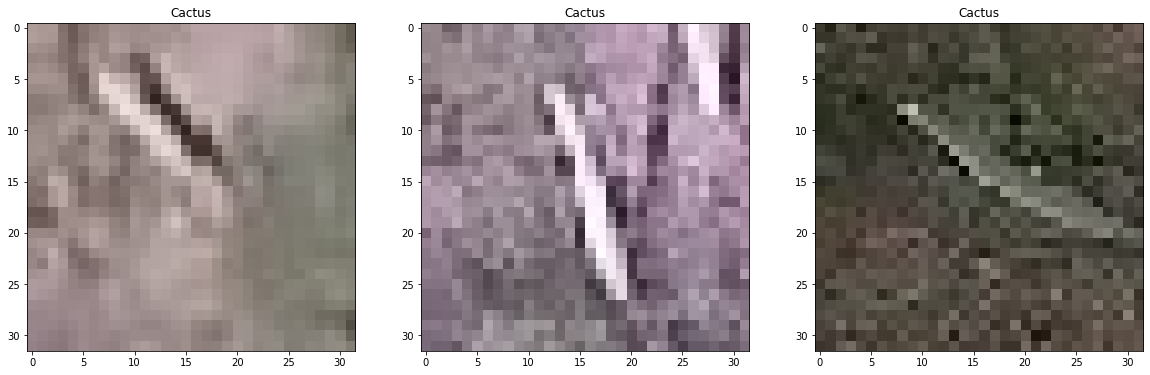

In [65]:
from PIL import Image
fig = plt.figure(1, figsize=(20, 20))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    pil_im = Image.open(train_dir + cacti.iloc[i, 0])
    im_arry = np.asarray(pil_im)
    arr = im_arry
    plt.title('Cactus')
    ax.imshow(arr)
plt.show()

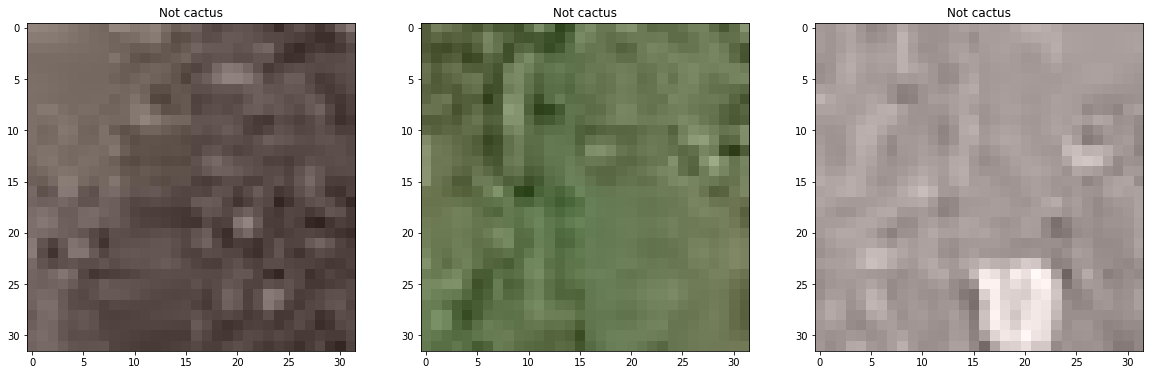

In [66]:
fig = plt.figure(1, figsize=(20, 20))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    pil_im = Image.open(train_dir + not_cacti.iloc[i, 0])
    im_arry = np.asarray(pil_im)
    arr = im_arry
    plt.title('Not cactus')
    ax.imshow(arr, cmap='viridis')
plt.show()

In [67]:
# Benchmark model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten

np.random.seed(100)

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
__________

In [68]:
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator

train_df.has_cactus = train_df.has_cactus.astype(str)
train_df = shuffle(train_df)
gen = ImageDataGenerator(rescale=1./255)
len_train = len(train_df.index)
ind = int(0.70*len_train)
train_gen = gen.flow_from_dataframe(dataframe=train_df[:ind],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=100,
                                            target_size=(32,32))


val_gen = gen.flow_from_dataframe(dataframe=train_df[ind:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(32,32))


Found 12250 validated image filenames belonging to 2 classes.
Found 5250 validated image filenames belonging to 2 classes.


In [70]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(train_gen, epochs=5, steps_per_epoch=100, validation_data=val_gen, validation_steps=50)

W0712 17:08:41.517927 15560 deprecation_wrapper.py:119] From c:\users\sraddhanjali acharya\pycharmprojects\udacity\aerialcactusidentify\ve\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 17:08:41.552921 15560 deprecation.py:323] From c:\users\sraddhanjali acharya\pycharmprojects\udacity\aerialcactusidentify\ve\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
100/100 [==============================] - 13s 125ms/step - loss: 0.2936 - acc: 0.8638 - val_loss: 0.1503 - val_acc: 0.9388
Epoch 2/5
100/100 [==============================] - 8s 77ms/step - loss: 0.1403 - acc: 0.9469 - val_loss: 0.1824 - val_acc: 0.9360
Epoch 3/5
100/100 [==============================] - 6s 63ms/step - loss: 0.1313 - acc: 0.9504 - val_loss: 0.1856 - val_acc: 0.9204
Epoch 4/5
100/100 [==============================] - 6s 62ms/step - loss: 0.1094 - acc: 0.9579 - val_loss: 0.0849 - val_acc: 0.9704
Epoch 5/5
100/100 [==============================] - 6s 63ms/step - loss: 0.1062 - acc: 0.9603 - val_loss: 0.1195 - val_acc: 0.9588


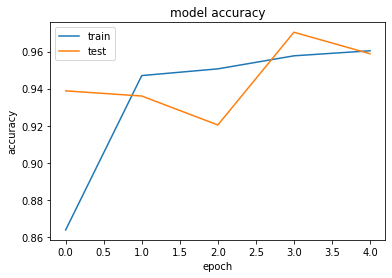

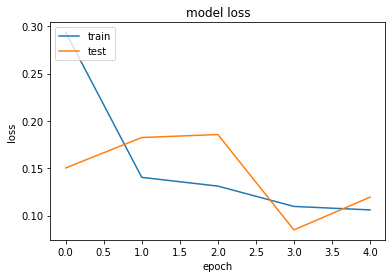

In [71]:
plot_history(history)

In [72]:
# Benchmark model has training acc greater than test accuracy -> could mean overfitting, solution: dropout
from keras.layers import Dropout
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPool2D(2, 2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 64)          18496     
__________

In [73]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(train_gen, epochs=5, steps_per_epoch=100, validation_data=val_gen, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 8s 77ms/step - loss: 0.2813 - acc: 0.8727 - val_loss: 0.1541 - val_acc: 0.9444
Epoch 2/5
100/100 [==============================] - 8s 77ms/step - loss: 0.1683 - acc: 0.9355 - val_loss: 0.1323 - val_acc: 0.9584
Epoch 3/5
100/100 [==============================] - 7s 69ms/step - loss: 0.1227 - acc: 0.9525 - val_loss: 0.1297 - val_acc: 0.9536
Epoch 4/5
100/100 [==============================] - 7s 69ms/step - loss: 0.1237 - acc: 0.9525 - val_loss: 0.1213 - val_acc: 0.9564
Epoch 5/5
100/100 [==============================] - 7s 68ms/step - loss: 0.0974 - acc: 0.9640 - val_loss: 0.1096 - val_acc: 0.9628


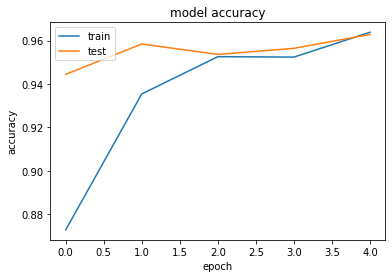

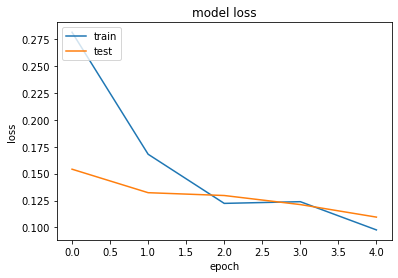

In [74]:
plot_history(history)

In [75]:
len_train = len(train_df.index)
ind = int(0.70*len_train)
train_rows = train_df[:ind].shape[0] // 100
val_rows = train_df[ind:].shape[0] // 50
print(train_rows)
print(val_rows)


122
105


In [76]:
aug_train_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rescale=1./255)
train_gen = aug_train_gen.flow_from_dataframe(dataframe=train_df[:ind],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=100,
                                            target_size=(32,32))


Found 12250 validated image filenames belonging to 2 classes.


In [77]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hd5', verbose=1, save_best_only=True)


In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(train_gen, epochs=5, steps_per_epoch=train_rows, validation_data=val_gen, validation_steps=val_rows, callbacks=[checkpointer])

Epoch 1/5
122/122 [==============================] - 16s 128ms/step - loss: 0.1593 - acc: 0.9416 - val_loss: 0.1875 - val_acc: 0.9206

Epoch 00001: val_loss improved from inf to 0.18753, saving model to aug_model.weights.best.hd5
Epoch 2/5
122/122 [==============================] - 14s 117ms/step - loss: 0.1261 - acc: 0.9537 - val_loss: 0.0723 - val_acc: 0.9756

Epoch 00002: val_loss improved from 0.18753 to 0.07228, saving model to aug_model.weights.best.hd5
Epoch 3/5
122/122 [==============================] - 14s 116ms/step - loss: 0.1260 - acc: 0.9539 - val_loss: 0.0657 - val_acc: 0.9794

Epoch 00003: val_loss improved from 0.07228 to 0.06573, saving model to aug_model.weights.best.hd5
Epoch 4/5
122/122 [==============================] - 14s 116ms/step - loss: 0.0944 - acc: 0.9658 - val_loss: 0.1024 - val_acc: 0.9570

Epoch 00004: val_loss did not improve from 0.06573
Epoch 5/5
122/122 [==============================] - 14s 116ms/step - loss: 0.0808 - acc: 0.9702 - val_loss: 0.0497 

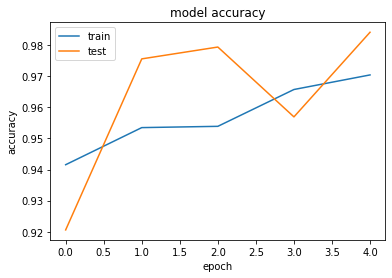

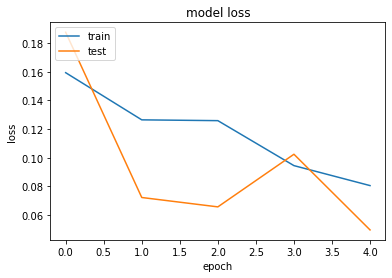

In [79]:
plot_history(history)

In [80]:
model.load_weights("aug_model.weights.best.hd5")

In [81]:
import os
x_test = []
ids = []
for f in os.listdir(test_dir):
    ids.append(f.split('.')[0])
    path = os.path.join(test_dir, f)
    pil_arr = np.asarray(Image.open(path))
    x_test.append(pil_arr)
x_test = np.array(x_test)
print(x_test.shape)
x_test = x_test.astype('float32')/255
    

(3975, 32, 32, 3)


In [87]:
predictions = model.predict_proba(x_test)

In [88]:
test_df = pd.DataFrame({'id': ids, 'has_cactus': predictions.flatten()})

In [89]:
test_df.to_csv("samplesubmission.csv", index=False)